# IMDB reviews dataset

## Importing dataset

In [10]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Get a feel of the data

In [11]:
print('Word indexes -- ', train_data[0])
print('Positive -- 1 and Negative -- 0', train_labels[0])

Word indexes --  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Positive -- 1 and Negative -- 0 1


### None of the word indexes go beyond 9999 (because num_words = 10000)

In [12]:
max([max(sequence) for sequence in train_data])

9999

### Try get a feel of the data by seeing what was the review in training and what's the label 

In [13]:
word_index = imdb.get_word_index() # word_index contains -- (word, index)
reverse_word_index = dict( 
        [(value, key) for (key, value) in word_index.items()]) # Just reversing the mapping to obtain word from index
decoded_review = ' '.join(
        [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # Get the statement of X_train[0]
print('Decoded review -- ', decoded_review)
print('Label alloted -- ' , train_labels[0])

Decoded review --  ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have

## Preparing data

### Cannot use lists in neural nets, so One-hot vectorize your lists -- eg. [3, 5] would appear as numpy 1_D vector with 3 and 5 index as 1 and rest zeros

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

### Vectorize labels

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Defining the network

> ### Two intermediate layers with 16 hidden units each
> ### A third layer that will output the scalar prediction regarding the sentiment of the current review

In [29]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(10000, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compiling the model

In [30]:
from keras import optimizers
from keras import metrics

### Create validation set to monitor accuracy

In [31]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training your model

In [32]:
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 263us/step - loss: 0.5222 - acc: 0.7840 - val_loss: 0.3928 - val_acc: 0.8677
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.3151 - acc: 0.8974 - val_loss: 0.3156 - val_acc: 0.8808
Epoch 3/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.2296 - acc: 0.9255 - val_loss: 0.2791 - val_acc: 0.8919
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1806 - acc: 0.9393 - val_loss: 0.2899 - val_acc: 0.8823
Epoch 5/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.1428 - acc: 0.9535 - val_loss: 0.3023 - val_acc: 0.8818
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1178 - acc: 0.9629 - val_loss: 0.2924 - val_acc: 0.8864
Epoch 7/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.0972 - acc: 0.9713 - val_loss: 0.3093 - 

## History

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Plotting the training and validation loss

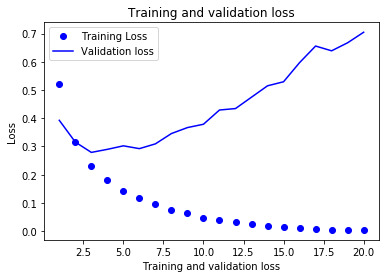

In [35]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Training and validation loss')
plt.ylabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the training and validation accuracy

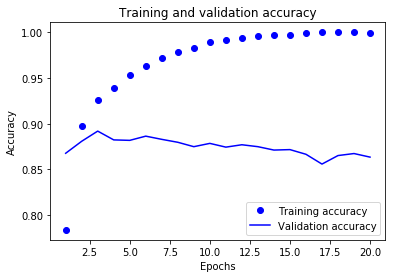

In [37]:
plt.clf() ## Clears the figure

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()